In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

# Моделювання руху тіла, кинутого під кутом до горизонту

## Task 1.1 Без врахування опору середовища. Залежності від кута

In [2]:
alpha_var = np.linspace(0, 90, 1000)
v0 = 80
g = 9.81
t_alpha = v0*np.sin(np.deg2rad(alpha_var))/g
h_alpha = (v0*np.sin(np.deg2rad(alpha_var)))**2/(2*g)
l_alpha = v0**2 * np.sin(np.deg2rad(2*alpha_var))/g

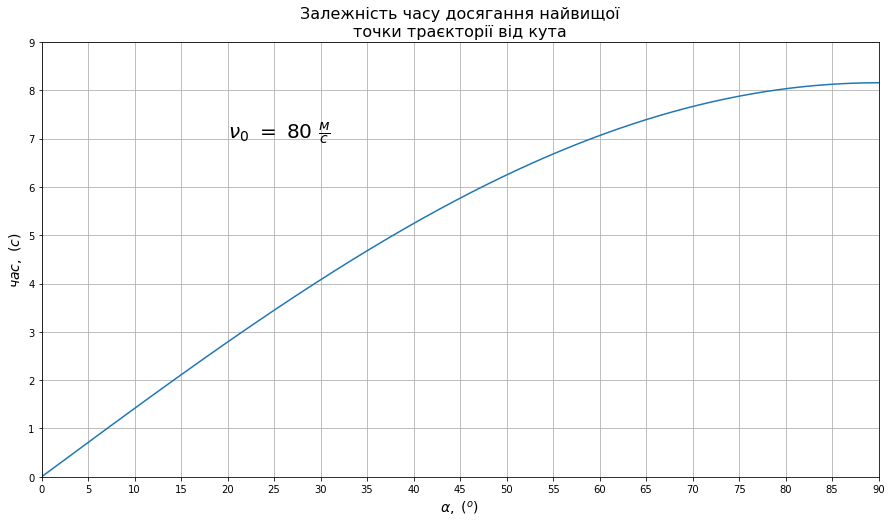

In [3]:
plt.figure(figsize=(15,8))
plt.xticks(range(0, 91, 5))
plt.yticks(range(0, 10, 1))
plt.xlabel(r'$\alpha,\ (^o)$', fontsize=14)
plt.ylabel(r'$час,\ (c)$', fontsize=14)
plt.title('Залежність часу досягання найвищої\nточки траєкторії від кута', fontsize=16)
plt.grid(True)
plt.axis([0, 90, 0, 9])
plt.text(20, 7, r'$\nu_0\ =\ 80\ \frac{м}{c}$', fontsize=20)
plt.plot(alpha_var, t_alpha)
plt.show()

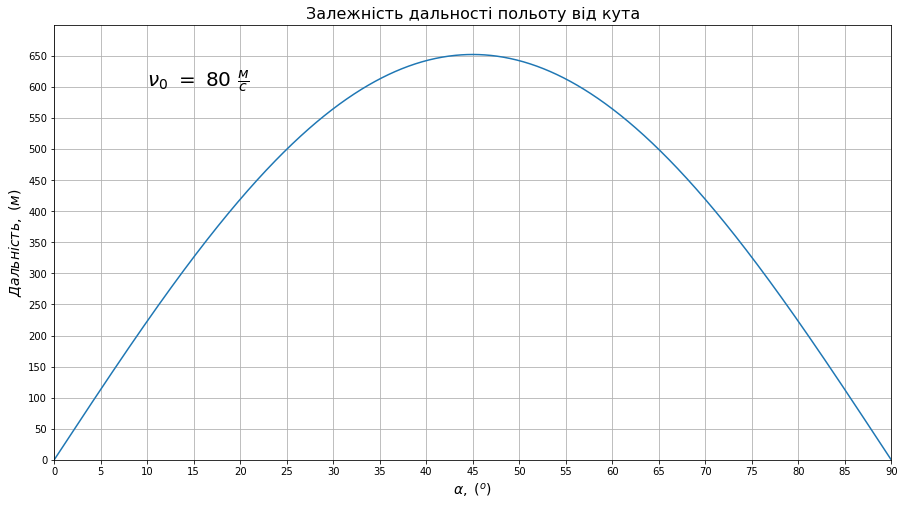

In [4]:
plt.figure(figsize=(15,8))
plt.xticks(range(0, 91, 5))
plt.yticks(range(0, 700, 50))
plt.xlabel(r'$\alpha,\ (^o)$', fontsize=14)
plt.ylabel(r'$Дальність,\ (м)$', fontsize=14)
plt.title('Залежність дальності польоту від кута', fontsize=16)
plt.grid(True)
plt.text(10, 600, r'$\nu_0\ =\ 80\ \frac{м}{c}$', fontsize=20)
plt.axis([0, 90, 0, 700])
plt.plot(alpha_var, l_alpha)
plt.show()

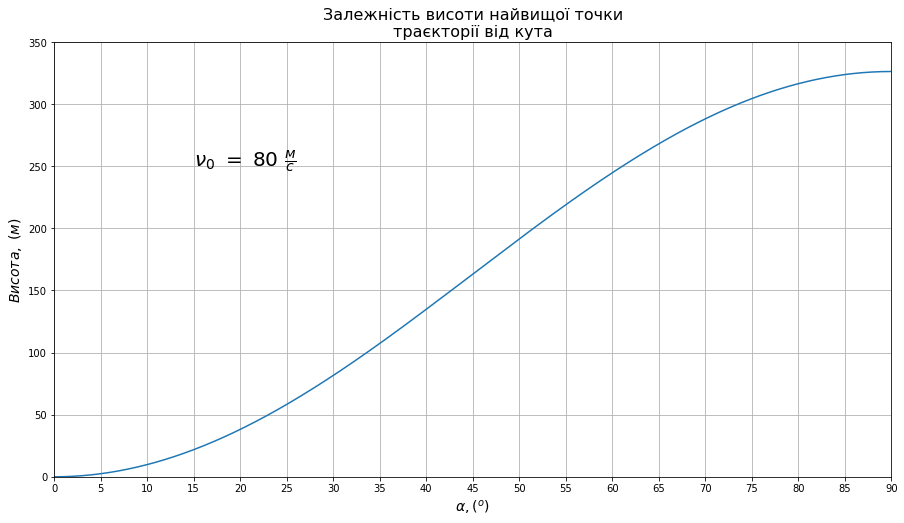

In [5]:
plt.figure(figsize=(15,8))
plt.xticks(range(0, 91, 5))
plt.yticks(range(0, 351, 50))
plt.xlabel(r'$\alpha, (^o)$', fontsize=14)
plt.ylabel(r'$Висота,\ (м)$', fontsize=14)
plt.title('Залежність висоти найвищої точки\nтраєкторії від кута', fontsize=16)
plt.grid(True)
plt.text(15, 250, r'$\nu_0\ =\ 80\ \frac{м}{c}$', fontsize=20)
plt.axis([0, 90, 0, 350])
plt.plot(alpha_var, h_alpha)
plt.show()

## Task 1.2 Без врахування опору середовища. Залежності від початкової швидкості

In [6]:
v0_var = np.linspace(0, 100, 1000)
alpha = 75
g = 9.81
t_v0 = v0_var*np.sin(np.deg2rad(alpha))/g
h_v0 = (v0_var*np.sin(np.deg2rad(alpha)))**2/(2*g)
l_v0 = v0_var**2 * np.sin(np.deg2rad(2*alpha))/g

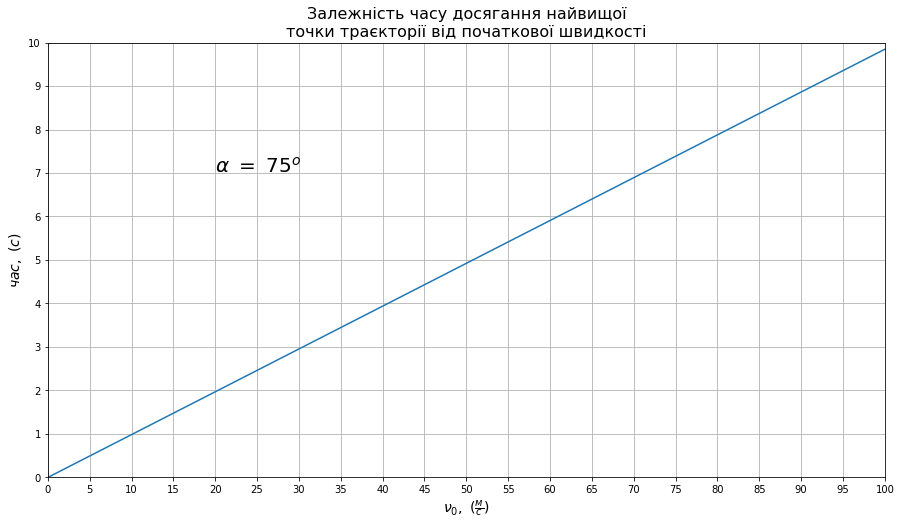

In [7]:
plt.figure(figsize=(15,8))
plt.xticks(range(0, 101, 5))
plt.yticks(range(0, 11, 1))
plt.xlabel(r'$\nu_0,\ (\frac{м}{c})$', fontsize=14)
plt.ylabel(r'$час,\ (c)$', fontsize=14)
plt.title('Залежність часу досягання найвищої\nточки траєкторії від початкової швидкості', fontsize=16)
plt.grid(True)
plt.axis([0, 100, 0, 10])
plt.text(20, 7, r'$\alpha\ =\ 75^o$', fontsize=20)
plt.plot(v0_var, t_v0)
plt.show()

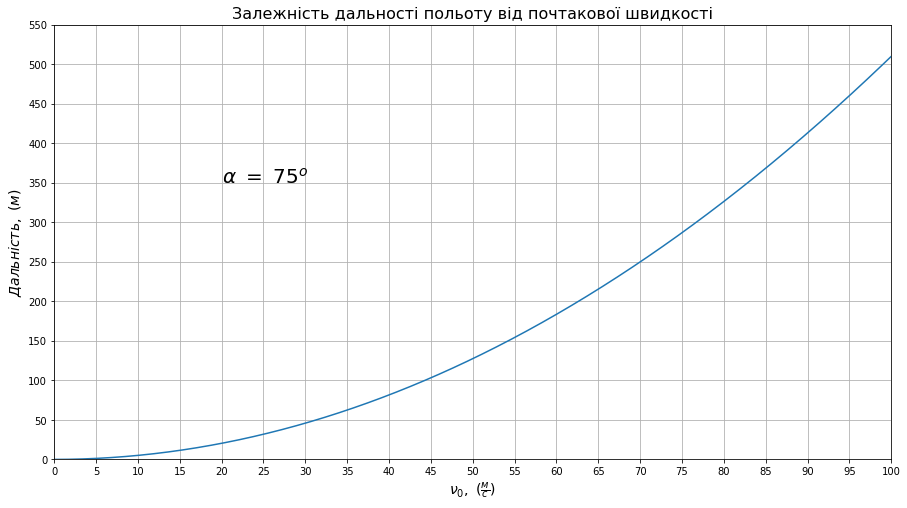

In [8]:
plt.figure(figsize=(15,8))
plt.xticks(range(0, 101, 5))
plt.yticks(range(0, 551, 50))
plt.xlabel(r'$\nu_0,\ (\frac{м}{c})$', fontsize=14)
plt.ylabel(r'$Дальність,\ (м)$', fontsize=14)
plt.title('Залежність дальності польоту від почтакової швидкості', fontsize=16)
plt.grid(True)
plt.text(20, 350, r'$\alpha\ =\ 75^o$', fontsize=20)
plt.axis([0, 100, 0, 550])
plt.plot(v0_var, l_v0)
plt.show()

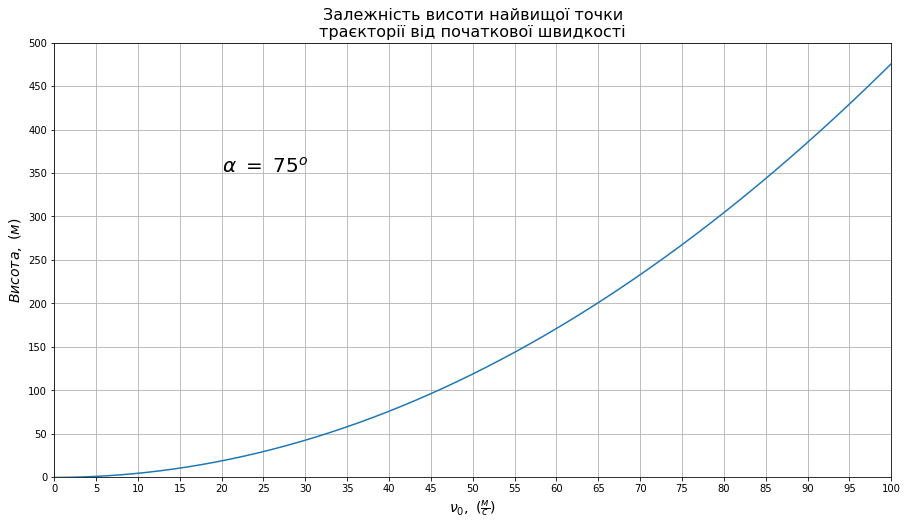

In [9]:
plt.figure(figsize=(15,8))
plt.xticks(range(0, 101, 5))
plt.yticks(range(0, 501, 50))
plt.xlabel(r'$\nu_0,\ (\frac{м}{c})$', fontsize=14)
plt.ylabel(r'$Висота,\ (м)$', fontsize=14)
plt.title('Залежність висоти найвищої точки\nтраєкторії від початкової швидкості', fontsize=16)
plt.grid(True)
plt.text(20, 350, r'$\alpha\ =\ 75^o$', fontsize=20)
plt.axis([0, 100, 0, 500])
plt.plot(v0_var, h_v0)
plt.show()

## Task 2 Із урахуванням опору середовища

In [10]:
def func(z, t, a, b, alpha):
    vx = z[0]
    vy = z[1]
    x = z[2]
    y = z[3]
    
    dvxdt = -a*np.sin(alpha)*vx-b*np.sin(alpha)*np.sqrt(vx**2+vy**2)*vx
    dvydt = -np.sin(alpha)-a*np.sin(alpha)*vy-b*np.sin(alpha)*np.sqrt(vx**2+vy**2)*vy
    dxdt = vx/(2*np.cos(alpha))
    dydt = 2*vy/np.sin(alpha)
    
    return [dvxdt, dvydt, dxdt, dydt]

In [11]:
alpha = np.deg2rad(75)
R = 0.2
mu = 0.0182
p = 7300
v0 = 80
g = 9.81
C = 0.4

z0 = [np.cos(alpha), np.sin(alpha), 0, 0]
t = np.linspace(0, 2, 1000)

a = 0
b = 0
z1 = odeint(func, z0, t, args=(a, b, alpha,))

vx_1 = np.array(z1[:,0])
vy_1 = np.array(z1[:,1])
x_1 = np.array(z1[:,2])
y_1 = np.array(z1[:,3])

v_1 = np.sqrt(vx_1**2+vy_1**2)

a = 1
b = 0
z2 = odeint(func, z0, t, args=(a, b, alpha,))

vx_2 = np.array(z2[:,0])
vy_2 = np.array(z2[:,1])
x_2 = np.array(z2[:,2])
y_2 = np.array(z2[:,3])

v_2 = np.sqrt(vx_2**2+vy_2**2)

a = 0
b = 1
z3 = odeint(func, z0, t, args=(a, b, alpha,))

vx_3 = np.array(z3[:,0])
vy_3 = np.array(z3[:,1])
x_3 = np.array(z3[:,2])
y_3 = np.array(z3[:,3])

v_3 = np.sqrt(vx_3**2+vy_3**2)

a = 1
b = 1
z4 = odeint(func, z0, t, args=(a, b, alpha,))

vx_4 = np.array(z4[:,0])
vy_4 = np.array(z4[:,1])
x_4 = np.array(z4[:,2])
y_4 = np.array(z4[:,3])

v_4 = np.sqrt(vx_4**2+vy_4**2)

In [12]:
def idx(arr):
    i = 1
    while arr[i] >= 0:
        i += 1
    return i

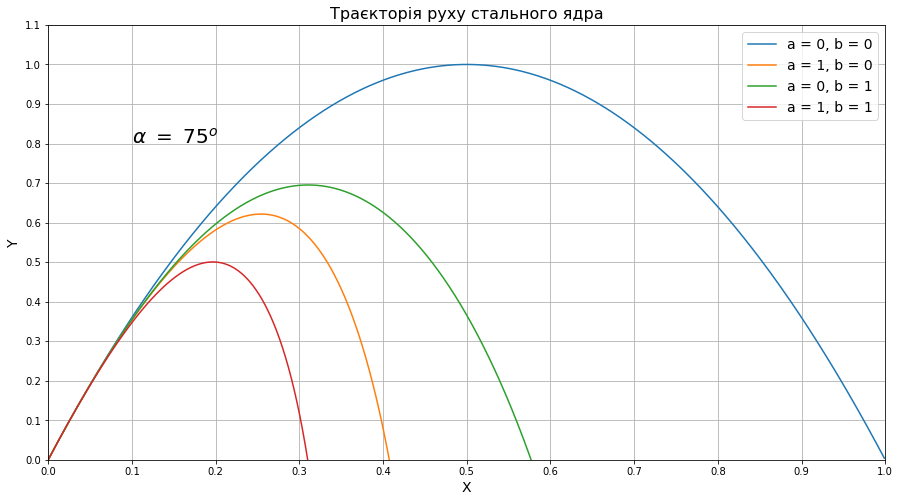

In [15]:
plt.figure(figsize=(15,8))
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1.1, 12))
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Траєкторія руху стального ядра', fontsize=16)
plt.text(0.1, 0.8, r'$\alpha\ =\ 75^o$', fontsize=20)
plt.axis([0, 1, 0, 1.1])
plt.plot(x_1[:idx(y_1)], y_1[:idx(y_1)], label='a = 0, b = 0')
plt.plot(x_2[:idx(y_2)], y_2[:idx(y_2)], label='a = 1, b = 0')
plt.plot(x_3[:idx(y_3)], y_3[:idx(y_3)], label='a = 0, b = 1')
plt.plot(x_4[:idx(y_4)], y_4[:idx(y_4)], label='a = 1, b = 1')
plt.legend(fontsize=14)
plt.grid()
plt.show()

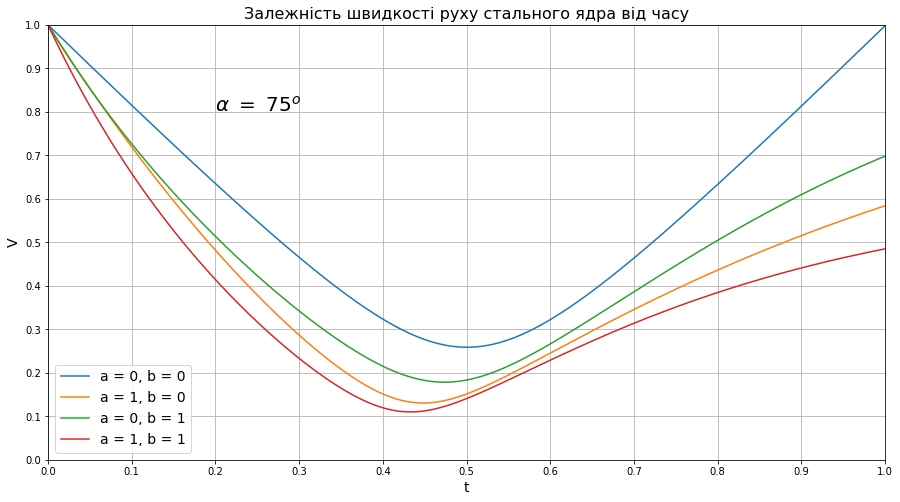

In [16]:
plt.figure(figsize=(15,8))
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel(r't', fontsize=14)
plt.ylabel(r'V', fontsize=14)
plt.title('Залежність швидкості руху стального ядра від часу', fontsize=16)
plt.text(0.2, 0.8, r'$\alpha\ =\ 75^o$', fontsize=20)
plt.axis([0, 1, 0, 1])
plt.plot(t[:idx(y_1)]/np.max(t[:idx(y_1)]), v_1[:idx(y_1)], label='a = 0, b = 0')
plt.plot(t[:idx(y_2)]/np.max(t[:idx(y_2)]), v_2[:idx(y_2)], label='a = 1, b = 0')
plt.plot(t[:idx(y_3)]/np.max(t[:idx(y_3)]), v_3[:idx(y_3)], label='a = 0, b = 1')
plt.plot(t[:idx(y_4)]/np.max(t[:idx(y_4)]), v_4[:idx(y_4)], label='a = 1, b = 1')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()